# 후보키

In [2]:
relations = [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]

In [3]:
col_range = range(len(relations[0]))
unique_keys = []

In [4]:
col_range

range(0, 4)

In [74]:
from itertools import combinations

In [75]:
help(combinations)

Help on class combinations in module itertools:

class combinations(builtins.object)
 |  combinations(iterable, r)
 |  
 |  Return successive r-length combinations of elements in the iterable.
 |  
 |  combinations(range(4), 3) --> (0,1,2), (0,1,3), (0,2,3), (1,2,3)
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  __sizeof__(...)
 |      Returns size in memory, in bytes.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [20]:
for i in col_range:
    if i == 2:
        comb =combinations(col_range,i + 1)

In [21]:
for candidate in comb:
    print(candidate)


(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)


In [22]:
temp = {tuple(item[i] for i in candidate) for item in relations}

In [24]:
unique_keys = [(0,),(1,2)]

In [25]:
any(set(c).issubset(candidate) for c in unique_keys) 

True

In [ ]:
#기존 
from itertools import combinations

def solution(relations):
    row, col = len(relations), len(relations[0])
    candidates = []

    for i in range(1, col + 1):
        candidates.extend(combinations([x for x in range(col)], i))

    results = []
    for candidate in candidates:
        temp = [tuple([relation[i] for i in candidate]) for relation in relations]

        if len(set(temp)) == row:
            check = True
            for res in results:
                if set(res).issubset(set(candidate)):
                    check = False
                    break
            if check:
                results.append(candidate)

    return len(results)

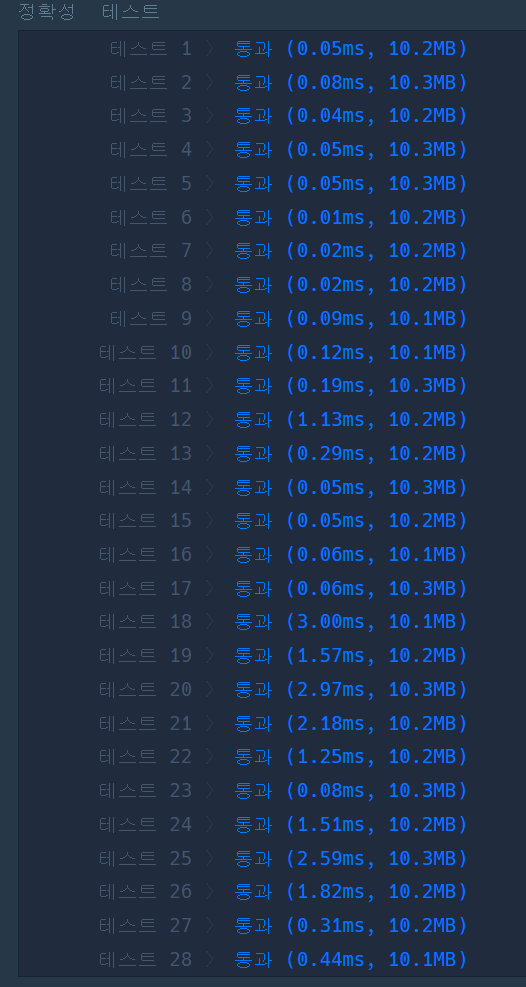

In [26]:
#간결하게 바꿈
from itertools import combinations
def is_unique_and_minimal(candidate,relations,unique_keys):
    temp = {tuple(item[i] for i in candidate) for item in relations} #유일성 확인
    if len(temp) == len(relations):
        return not any(set(c).issubset(candidate) for c in unique_keys) #최소성 확인, 이미 존재하는 key가 부분집합으로 존재하면 최소성 만족 불가
    return False

def solution(relations):
    col_range = range(len(relations[0]))
    unique_keys = []
    for i in col_range:
        for candidate in combinations(col_range, i + 1):
            if is_unique_and_minimal(candidate,relations,unique_keys):
                unique_keys.append(candidate)
    return len(unique_keys)

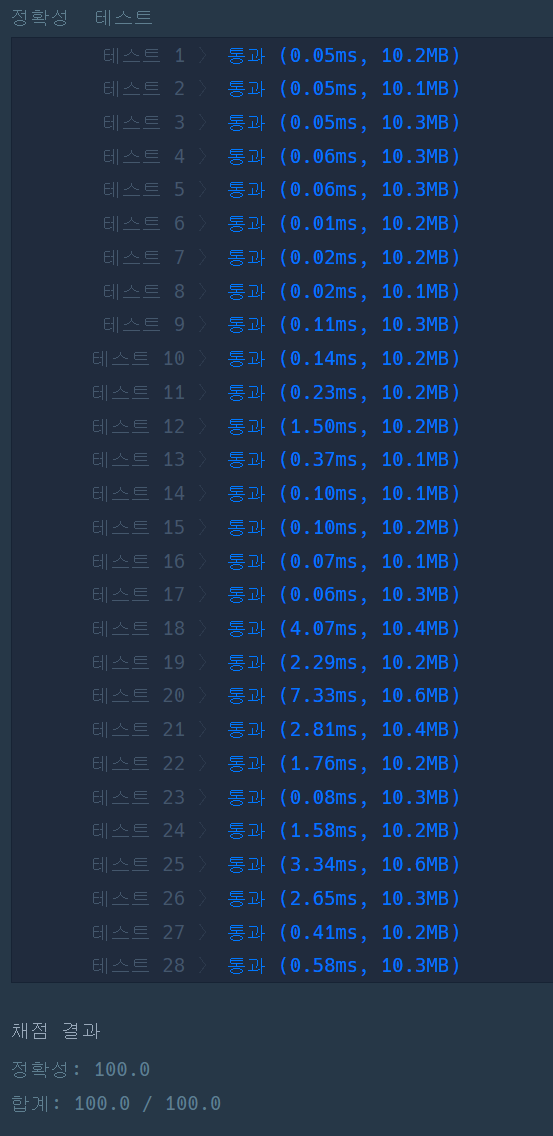

- set(a).issubset(c) : a가 c의 부분집합인지 확인하는 메소드
- any(True,False,....,True) : 하나라도 True이면 True를 retrun
- all(True,True...True) : 모두가 True이여 True를 return

# 이모티콘 할인 행사

In [ ]:
#원본 풀이
import math
from itertools import product
def solution(users, emoticons):
    users = list(map(list,zip(*users)))
    users_rates,users_price = users[0], users[1]
    rates = set(map(lambda x : math.ceil(x/10) * 10,users_rates))
    candidate_rate =list(product(rates,repeat=len(emoticons)))

    results = [0,0]
    for rates in candidate_rate:
        emo_price = [int(v * (100-rates[i])/100) for i,v in enumerate(emoticons)]
        service_cnt = 0
        total_price = 0
        #print(rates)
        # 경우의 수 별 이모티콘 구매비용 과 서비스 가입자 수 구하기
        for i, user_rate in enumerate(users_rates): #유저별 이모티콘 구매하는지 판단
            #print(user_rate)
            price = 0 # 사용자별로 이모티콘 구매 비용 저장
            for j,emoticon_price in enumerate(emoticons):
                if rates[j] >= user_rate:
                    price += emo_price[j]

            # 서비스 가입하는지 확인
            if price >= users_price[i]:
                service_cnt += 1
                price = 0

            # 이모티콘 총 구매비용 
            if price != 0:
                total_price += price
        #print(f'service 가입자 : {service_cnt}, total_price : {total_price}')
        if service_cnt > results[0]: #서비스 가입자가 우선
            
            results= [service_cnt,total_price]
        elif service_cnt == results[0]:
            if total_price >= results[1]:
                results = [service_cnt,total_price]
                
    return results

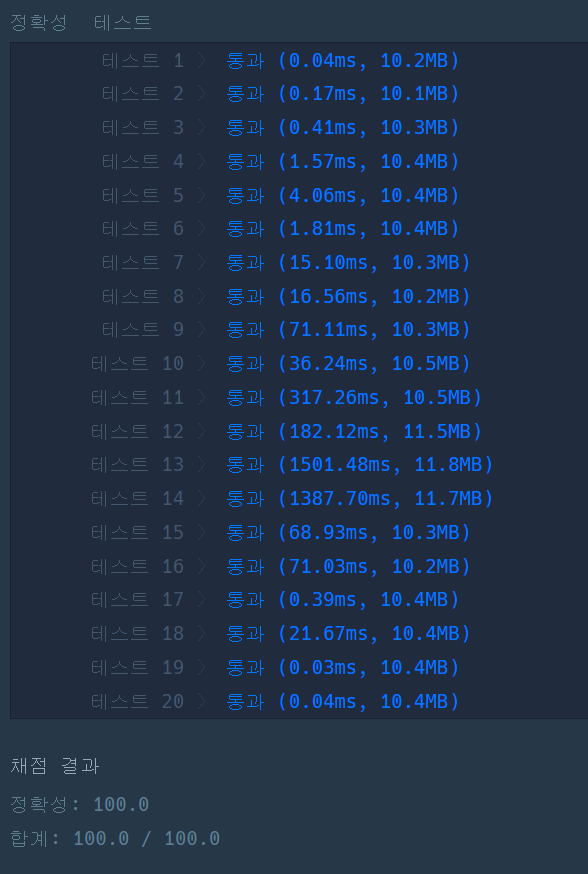

In [ ]:
#간결하게 한 코드 
from itertools import product

def calculate_discounted_prices(emoticons, discount_rates):
    return [price * (100 - rate) // 100 for price, rate in zip(emoticons, discount_rates)] 
def solution(users, emoticons):
    discount_steps = range(10, 41, 10)
    max_service_count, max_total_price = 0, 0

    for discount_rates in product(discount_steps, repeat=len(emoticons)):
        discounted_prices = calculate_discounted_prices(emoticons, discount_rates)
        service_count, total_price = 0, 0

        for user_rate, user_price in users:
            user_total_price = sum(price for price, rate in zip(discounted_prices, discount_rates) if rate >= user_rate)

            if user_total_price >= user_price:
                service_count += 1
            else:
                total_price += user_total_price

        if service_count > max_service_count or (service_count == max_service_count and total_price > max_total_price):
            max_service_count, max_total_price = service_count, total_price

    return [max_service_count, max_total_price]

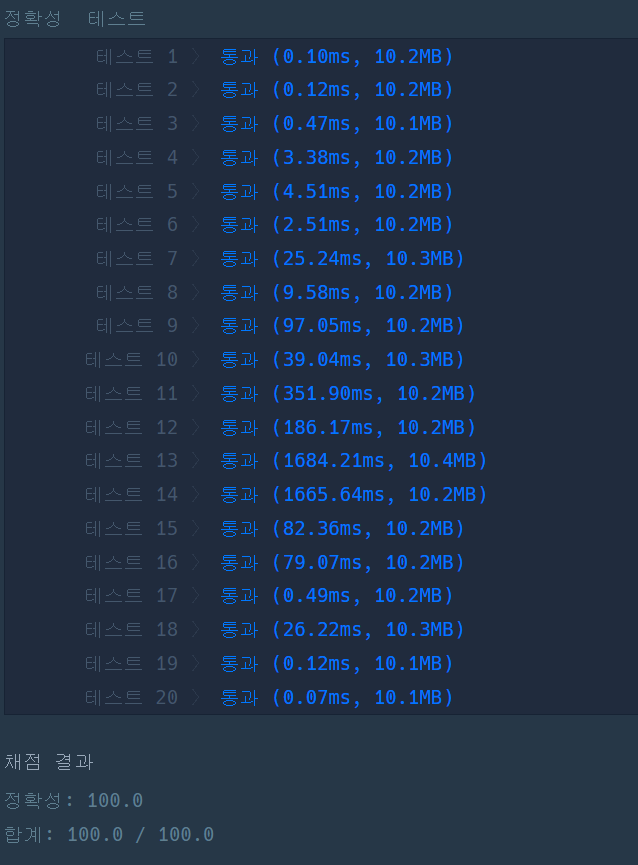